In [2]:
#uses Iris database and SGD classifier
import sklearn
print( 'The scikit learn version is {}.'.format(sklearn.__version__))

from sklearn import datasets
iris = datasets.load_iris()
X_iris, y_iris = iris.data, iris.target
print( X_iris.shape, y_iris.shape)
print( X_iris[0], y_iris[0])

The scikit learn version is 0.20.1.
(150, 4) (150,)
[5.1 3.5 1.4 0.2] 0


In [5]:
from sklearn.model_selection import train_test_split
#add model selection
from sklearn import preprocessing
# Get dataset with only the first two attributes
X, y = X_iris[:, :2], y_iris

# Split the dataset into a training and a testing set
# Test set will be the 25% taken randomly
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.25, random_state=33)
print( X_train.shape, y_train.shape)

#Standardize the features
scaler = preprocessing.StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
print(X_train[:4,:])

(112, 2) (112,)
[[-0.91090798 -1.59775374]
 [-1.0271058   0.08448757]
 [ 0.59966379 -1.59775374]
 [ 0.01867465 -0.96691325]]


Text(0, 0.5, 'Sepal width')

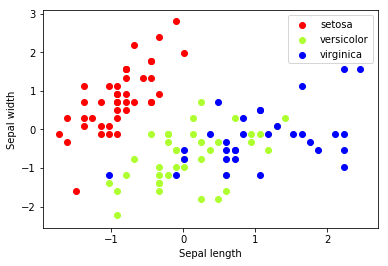

In [9]:
import matplotlib.pyplot as plt
colors = ['red', 'greenyellow', 'blue']
#it doesnt like "xrange" changed to "range"
for i in range(len(colors)):
    xs = X_train[:, 0][y_train == i]
    ys = X_train[:, 1][y_train == i]
    plt.scatter(xs, ys, c=colors[i])
plt.legend(iris.target_names)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')

In [7]:
#SDGclassifier refers to Stochastic Gradient Descent
from sklearn.linear_model import SGDClassifier
clf = SGDClassifier()
clf.fit(X_train, y_train)

print( clf.coef_)
print( clf.intercept_)

[[-33.03434091  16.45071835]
 [-12.91027828  -1.08386871]
 [ 22.24028351   2.15569442]]
[-18.68862847 -15.46833865 -10.90496052]


C:\Users\Wincy\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


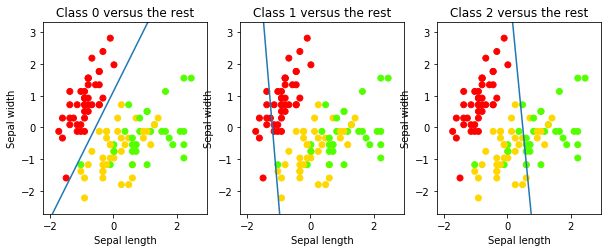

In [17]:
import matplotlib.pyplot as plt
import numpy as np
x_min, x_max = X_train[:, 0].min() - .5, X_train[:, 0].max() + .5
y_min, y_max = X_train[:, 1].min() - .5, X_train[:, 1].max() + .5

Xs = np.arange(x_min, x_max, 0.5)

fig,axes = plt.subplots(1, 3)
fig.set_size_inches(10, 6)
for i in [0, 1, 2]:
    axes[i].set_aspect('equal')
    axes[i].set_title('Class '+ str(i) + ' versus the rest')
    axes[i].set_xlabel('Sepal length')
    axes[i].set_ylabel('Sepal width')
    axes[i].set_xlim(x_min, x_max)
    axes[i].set_ylim(y_min, y_max)

    plt.sca(axes[i])
    plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=plt.cm.prism)
    ys = (-clf.intercept_[i] - Xs * clf.coef_[i, 0]) / clf.coef_[i, 1]
    plt.plot(Xs, ys)
#delete hold=ture, xs replaced by Xs
#unknown property hold

In [11]:
print( clf.predict(scaler.transform([[4.7, 3.1]])) )
print( clf.decision_function(scaler.transform([[4.7, 3.1]])) )

from sklearn import metrics
y_train_pred = clf.predict(X_train)
print( metrics.accuracy_score(y_train, y_train_pred) )

y_pred = clf.predict(X_test)
print( metrics.accuracy_score(y_test, y_pred) )
print( metrics.classification_report(y_test, y_pred, target_names=iris.target_names) )
print( metrics.confusion_matrix(y_test, y_pred) )

print("My name is Yunxi Wu")
print("My NetID is: yunxiw2")
print("I hereby certify that I have read the University policy on Academic Integrity and that I am not in violation.")

[0]
[[ 24.3080533    0.70060226 -38.7345007 ]]
0.7767857142857143
0.7105263157894737
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00         8
  versicolor       0.50      0.09      0.15        11
   virginica       0.64      0.95      0.77        19

   micro avg       0.71      0.71      0.71        38
   macro avg       0.71      0.68      0.64        38
weighted avg       0.68      0.71      0.64        38

[[ 8  0  0]
 [ 0  1 10]
 [ 0  1 18]]
My name is Yunxi Wu
My NetID is: yunxiw2
I hereby certify that I have read the University policy on Academic Integrity and that I am not in violation.


In [ ]:
https://github.com/yunxiwu/IE598_F19_HW1